# Assignment 2 - Redes Complejas

In [2]:
import numpy as np

# Q1

In [30]:
Adj= np.array([
    [0, 1, 1, 0, 0, 0, 0], 
    [1, 0, 1, 0, 0, 0, 0], 
    [1, 1, 0, 1, 0, 0, 0], 
    [0, 0, 1, 0, 1, 1, 0], 
    [0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 0, 1, 1, 0, 1], 
    [0, 0, 0, 0, 0, 1, 0]
])

Adj

array([[0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

In [31]:
D = np.diag(np.sum(Adj, axis=1))
L = D - Adj
L

array([[ 2, -1, -1,  0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0],
       [-1, -1,  3, -1,  0,  0,  0],
       [ 0,  0, -1,  3, -1, -1,  0],
       [ 0,  0,  0, -1,  2, -1,  0],
       [ 0,  0,  0, -1, -1,  3, -1],
       [ 0,  0,  0,  0,  0, -1,  1]])

In [32]:
from scipy.linalg import eig

w, v = eig(L)

idx = np.argsort(w)
w = w[idx]
v = v[:, idx]

In [33]:
fiedler_value = w[1]
fiedler_vector = v[:, 1]

print(f"The fiedler values is {fiedler_value}")
print(f"The fiedler vector is {fiedler_vector}")

The fiedler values is (0.34032095848177174+0j)
The fiedler vector is [ 0.46724728  0.46724728  0.30823323 -0.11469308 -0.27370712 -0.33957289
 -0.5147547 ]


In [7]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(range(len(Adj)))
for i in range(len(Adj)):
    for j in range(len(Adj)):
        if Adj[i][j] == 1:
            G.add_edge(i, j)

community_1 = [i for i, x in enumerate(fiedler_vector) if x >= 0]
community_2 = [i for i, x in enumerate(fiedler_vector) if x < 0]

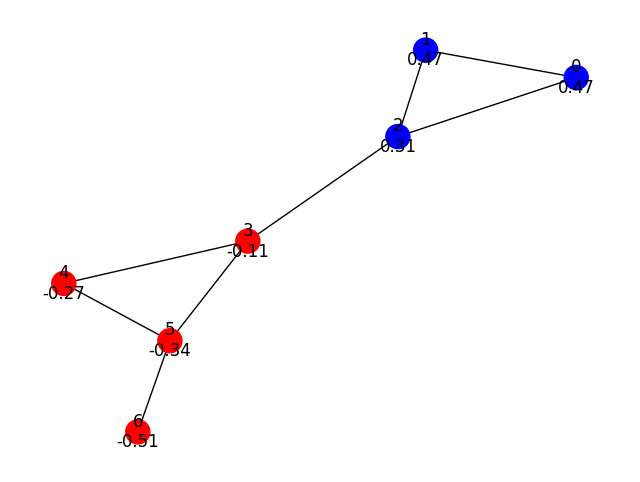

In [8]:
import matplotlib.pyplot as plt

node_colors = ['blue' if node in community_1 else 'red' for node in G.nodes()]

pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
labels = {i: f'{i}\n{fiedler_vector[i]:.2f}' for i in range(len(fiedler_vector))}
nx.draw_networkx_labels(G, pos, labels, font_size=12, )
nx.draw(G, pos=pos, with_labels=False, node_color=node_colors, node_size=300)
plt.show()

In [ ]:
Adj= np.array([
    [0, 1, 1, 0, 0, 0, 0], 
    [1, 0, 1, 0, 0, 0, 0], 
    [1, 1, 0, 1, 0, 0, 0], 
    [0, 0, 1, 0, 1, 1, 0], 
    [0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 0, 1, 1, 0, 1], 
    [0, 0, 0, 0, 0, 1, 0]
])

Adj

# Q3

In [1]:
import numpy as np

In [2]:
import networkx as nx

delfines_graph = nx.read_pajek('data/delfines.net')

print("Delfines")
delfines_graph_total_nodes, delfines_graph_total_edges = delfines_graph.number_of_nodes(), delfines_graph.number_of_edges()
print("Number of nodes:", delfines_graph_total_nodes)
print("Number of edges:", delfines_graph_total_edges)

Delfines
Number of nodes: 62
Number of edges: 159


In [3]:
import networkx as nx

gnutella_graph = nx.read_pajek('data/gnutella.net')
print("Gnutella")
gnutella_graph_total_nodes, gnutella_graph_total_edges = gnutella_graph.number_of_nodes(), gnutella_graph.number_of_edges()
print("Number of nodes:", gnutella_graph_total_nodes)
print("Number of edges:", gnutella_graph_total_edges)

Gnutella
Number of nodes: 795
Number of edges: 852


In [4]:
gnutella_density = nx.density(gnutella_graph)
delfines_density = nx.density(delfines_graph)

print("Density of delfines graph:", delfines_density)
print("Density of gnutella graph:", gnutella_density)

Density of delfines graph: 0.08408249603384453
Density of gnutella graph: 0.002699491469036643


In [5]:
delfines_graph_erdos_renyi = nx.erdos_renyi_graph(delfines_graph_total_nodes, delfines_density)

print("Delfines Erdos Renyi")
delfines_graph_erdos_renyi_total_nodes, delfines_graph_erdos_renyi_total_edges = delfines_graph_erdos_renyi.number_of_nodes(), delfines_graph_erdos_renyi.number_of_edges()
print("Number of nodes:", delfines_graph_erdos_renyi_total_nodes)
print("Number of edges:", delfines_graph_erdos_renyi_total_edges)

Delfines Erdos Renyi
Number of nodes: 62
Number of edges: 152


In [6]:
gnutella_erdos_renyi_graph = nx.erdos_renyi_graph(gnutella_graph_total_nodes, gnutella_density)

print("Gnutella Erdos Renyi")
gnutella_erdos_renyi_graph_total_nodes, gnutella_erdos_renyi_graph_total_edges = gnutella_erdos_renyi_graph.number_of_nodes(), gnutella_erdos_renyi_graph.number_of_edges()
print("Number of nodes:", gnutella_erdos_renyi_graph_total_nodes)
print("Number of edges:", gnutella_erdos_renyi_graph_total_edges)

Gnutella Erdos Renyi
Number of nodes: 795
Number of edges: 862


In [7]:
def giant_component_size_fn(G):
    largest_cc = max(nx.connected_components(G), key=len)
    return len(largest_cc)

In [8]:
def remove_nodes_until_half_giant_component_size(gnutella_graph):
    import random

    giant_component_size = giant_component_size_fn(gnutella_graph)
    target_component_size = giant_component_size // 2

    giant_sizes = [giant_component_size]

    i = 0
    while giant_sizes[-1] > target_component_size:
        i += 1
        node_to_remove = random.choice(list(gnutella_graph.nodes))
        gnutella_graph.remove_node(node_to_remove)
        current_giant_size = giant_component_size_fn(gnutella_graph)
        giant_sizes.append(current_giant_size)
    
    return giant_sizes

In [9]:
def remove_degree_nodes_until_half_giant_component_size(gnutella_graph):
    giant_component_size = giant_component_size_fn(gnutella_graph)
    target_component_size = giant_component_size // 2

    giant_sizes = [giant_component_size]

    i = 0
    while giant_sizes[-1] > target_component_size:
        i += 1
        node_to_remove = max(gnutella_graph.degree, key=lambda x: x[1])[0]
        gnutella_graph.remove_node(node_to_remove)
        current_giant_size = giant_component_size_fn(gnutella_graph)
        giant_sizes.append(current_giant_size)
    
    return giant_sizes

In [10]:
def remove_betweenness_nodes_until_half_giant_component_size(gnutella_graph):
    giant_component_size = giant_component_size_fn(gnutella_graph)
    target_component_size = giant_component_size // 2

    giant_sizes = [giant_component_size]

    i = 0
    while giant_sizes[-1] > target_component_size:
        i += 1
        node_to_remove = max(nx.betweenness_centrality(gnutella_graph).items(), key=lambda x: x[1])[0]
        gnutella_graph.remove_node(node_to_remove)
        current_giant_size = giant_component_size_fn(gnutella_graph)
        giant_sizes.append(current_giant_size)
    
    return giant_sizes

### Delfines

In [82]:
deleted_nodes_number = []
for i in range(100):
    delfines = delfines_graph.copy()
    giant_sizes_delfines = remove_nodes_until_half_giant_component_size(delfines)
    deleted_nodes_number.append(len(giant_sizes_delfines))

In [83]:
average_number_deleted_nodes = np.average(deleted_nodes_number)

In [84]:
print('Random removal')

print('Average number of nodes removed:', average_number_deleted_nodes)
print(f'Percentage of nodes removed: {(average_number_deleted_nodes / delfines_graph_total_nodes) * 100:.2f}%')
print('giant component size:', giant_sizes_delfines[-1])

Random removal
Average number of nodes removed: 26.15
Percentage of nodes removed: 42.18%
giant component size: 30


In [86]:
delfines = delfines_graph.copy()
giant_sizes_delfines = remove_degree_nodes_until_half_giant_component_size(delfines)
deleted_nodes_number = len(giant_sizes_delfines)

print('Degree removal')
print('Number of nodes removed:', int(deleted_nodes_number))
print(f'Percentage of nodes removed: {(deleted_nodes_number / delfines_graph_total_nodes) * 100:.2f}%')
print('Giant component size:', giant_sizes_delfines[-1])

Degree removal
Number of nodes removed: 16
Percentage of nodes removed: 25.81%
Giant component size: 30


In [87]:
delfines = delfines_graph.copy()
giant_sizes_delfines = remove_betweenness_nodes_until_half_giant_component_size(delfines)
deleted_nodes_number = len(giant_sizes_delfines)

print('Betweenness removal')
print('Number of nodes removed:', int(deleted_nodes_number))
print(f'Percentage of nodes removed: {(deleted_nodes_number / delfines_graph_total_nodes) * 100:.2f}%')
print('Giant component size:', giant_sizes_delfines[-1])

Betweenness removal
Number of nodes removed: 9
Percentage of nodes removed: 14.52%
Giant component size: 31


### Delfines Erdos Renyi

In [88]:
deleted_nodes_number = []
for i in range(100):
    delfines_erdos_renyi = delfines_graph_erdos_renyi.copy()
    giant_sizes_delfines_erdos_renyi = remove_nodes_until_half_giant_component_size(delfines_erdos_renyi)
    deleted_nodes_number.append(len(giant_sizes_delfines_erdos_renyi))

average_number_deleted_nodes = np.average(deleted_nodes_number)

print('Random removal')
print('Average number of nodes removed:', average_number_deleted_nodes)
print(f'Percentage of nodes removed: {(average_number_deleted_nodes / delfines_graph_erdos_renyi_total_nodes) * 100:.2f}%')
print('Giant component size:', giant_sizes_delfines_erdos_renyi[-1])

Random removal
Average number of nodes removed: 29.79
Percentage of nodes removed: 48.05%
Giant component size: 30


In [21]:
delfines_erdos_renyi = delfines_graph_erdos_renyi.copy()
giant_sizes_delfines_erdos_renyi = remove_degree_nodes_until_half_giant_component_size(delfines_erdos_renyi)
deleted_nodes_number = len(giant_sizes_delfines_erdos_renyi)

print('Degree removal')
print('Number of nodes removed:', int(deleted_nodes_number))
print(f'Percentage of nodes removed: {(deleted_nodes_number / delfines_graph_erdos_renyi_total_nodes) * 100:.2f}%')

Degree removal
Number of nodes removed: 21
Percentage of nodes removed: 33.87%


In [22]:
delfines_erdos_renyi = delfines_graph_erdos_renyi.copy()
giant_sizes_delfines_erdos_renyi = remove_betweenness_nodes_until_half_giant_component_size(delfines_erdos_renyi)
deleted_nodes_number = len(giant_sizes_delfines_erdos_renyi)

print('Betweenness removal')
print('Number of nodes removed:', int(deleted_nodes_number))
print(f'Percentage of nodes removed: {(deleted_nodes_number / delfines_graph_erdos_renyi_total_nodes) * 100:.2f}%')

Betweenness removal
Number of nodes removed: 18
Percentage of nodes removed: 29.03%


### Gnutella

In [24]:
deleted_nodes_number = []

for i in range(100):
    gnutella = gnutella_graph.copy()
    giant_sizes_gnutella = remove_nodes_until_half_giant_component_size(gnutella)
    deleted_nodes_number.append(len(giant_sizes_gnutella))

average_number_deleted_nodes = np.average(deleted_nodes_number)

print('Random removal')
print('Average number of nodes removed:', average_number_deleted_nodes)
print(f'Percentage of nodes removed: {(average_number_deleted_nodes / gnutella_graph_total_nodes) * 100:.2f}%')

Random removal
Average number of nodes removed: 270.63
Percentage of nodes removed: 34.04%


In [25]:
gnutella = gnutella_graph.copy()
giant_sizes_gnutella = remove_degree_nodes_until_half_giant_component_size(gnutella)
deleted_nodes_number = len(giant_sizes_gnutella)

print('Degree removal')
print('Number of nodes removed:', int(deleted_nodes_number))
print(f'Percentage of nodes removed: {(deleted_nodes_number / gnutella_graph_total_nodes) * 100:.2f}%')

Degree removal
Number of nodes removed: 25
Percentage of nodes removed: 3.14%


In [12]:
gnutella = gnutella_graph.copy()
giant_sizes_gnutella = remove_betweenness_nodes_until_half_giant_component_size(gnutella)
deleted_nodes_number = len(giant_sizes_gnutella)

print('Betweenness removal')
print('Number of nodes removed:', int(deleted_nodes_number))
print(f'Percentage of nodes removed: {(deleted_nodes_number / gnutella_graph_total_nodes) * 100:.2f}%')

Betweenness removal
Number of nodes removed: 26
Percentage of nodes removed: 3.27%


### Gnutella Erdos Renyi

In [27]:
deleted_nodes_number = []

for i in range(100):
    gnutella_erdos_renyi = gnutella_erdos_renyi_graph.copy()
    giant_sizes_gnutella_erdos_renyi = remove_nodes_until_half_giant_component_size(gnutella_erdos_renyi)
    deleted_nodes_number.append(len(giant_sizes_gnutella_erdos_renyi))

average_number_deleted_nodes = np.average(deleted_nodes_number)

print('Random removal')

print('Average number of nodes removed:', average_number_deleted_nodes)
print(f'Percentage of nodes removed: {(average_number_deleted_nodes / gnutella_erdos_renyi_graph_total_nodes) * 100:.2f}%')

Random removal
Average number of nodes removed: 222.92
Percentage of nodes removed: 28.04%


In [28]:
gnutella_erdos_renyi = gnutella_erdos_renyi_graph.copy()
giant_sizes_gnutella_erdos_renyi = remove_degree_nodes_until_half_giant_component_size(gnutella_erdos_renyi)
deleted_nodes_number = len(giant_sizes_gnutella_erdos_renyi)

print('Degree removal')
print('Number of nodes removed:', int(deleted_nodes_number))
print(f'Percentage of nodes removed: {(deleted_nodes_number / gnutella_erdos_renyi_graph_total_nodes) * 100:.2f}%')

Degree removal
Number of nodes removed: 63
Percentage of nodes removed: 7.92%


In [15]:
gnutella = gnutella_erdos_renyi_graph.copy()
giant_sizes_gnutella = remove_betweenness_nodes_until_half_giant_component_size(gnutella)
deleted_nodes_number = len(giant_sizes_gnutella)

print('Betweenness removal')
print('Number of nodes removed:', int(deleted_nodes_number))
print(f'Percentage of nodes removed: {(deleted_nodes_number / gnutella_graph_total_nodes) * 100:.2f}%')

Betweenness removal
Number of nodes removed: 51
Percentage of nodes removed: 6.42%


# Q4

In [74]:
import random
import networkx as nx

def create_er_with_partition(num_nodes, conn_prob, set_1, set_2, p):
    G = nx.erdos_renyi_graph(num_nodes, conn_prob)

    DG = nx.DiGraph()
    DG.add_nodes_from(G.nodes())
    for (u, v) in G.edges():
        if (u in set_1 and v in set_2):
            if random.random() < p:
                DG.add_edge(u, v)
            else:
                DG.add_edge(v, u)
                
        elif (u in set_2 and v in set_1):
            if random.random() < p:
                DG.add_edge(v, u)
            else:
                DG.add_edge(u, v)

        else:
            if random.random() < 0.5:
                DG.add_edge(u, v)
            else:
                DG.add_edge(v, u)

    return DG

def directed_modularity(DG, partition):
    m = DG.number_of_edges()
    A = nx.adjacency_matrix(DG).toarray()

    k_out = np.array([DG.out_degree(n) for n in DG.nodes()])
    k_in = np.array([DG.in_degree(n) for n in DG.nodes()])
    
    Q = 0.0
    for i in range(len(DG.nodes())):
        for j in range(len(DG.nodes())):
            if partition[i] == partition[j]:
                expected_weight = (k_out[j] * k_in[i]) / m
                Q += A[i][j] - expected_weight

    Q = Q / m

    return Q

### $ B_{1} $ y $B_{2} $

In [78]:
import numpy as np

num_nodes = 200
connection_prob = 0.2

B1 = set(range(100))
B2 = set(range(100, 200))

C1 = set(range(50)).union(set(range(100, 150)))
C2 = set(range(50, 100)).union(set(range(150, 200)))

avg_modularities_partition_1 = []
avg_modularities_partition_2 = []

for p in np.arange(0, 1.1, 0.1):
    modularities_partition_1 = []
    modularities_partition_2 = []


    for _ in range(100):
        DG = create_er_with_partition(num_nodes, connection_prob, B1, B2, p)
        partition_1 = [0 if node in B1 else 1 for node in DG.nodes()]
        partition_2 = [0 if node in C1 else 1 for node in DG.nodes()]
        modularities_partition_1.append(directed_modularity(DG, partition_1))
        modularities_partition_2.append(directed_modularity(DG, partition_2))

    avg_modularities_partition_1.append(np.average(modularities_partition_1))
    avg_modularities_partition_2.append(np.average(modularities_partition_2))

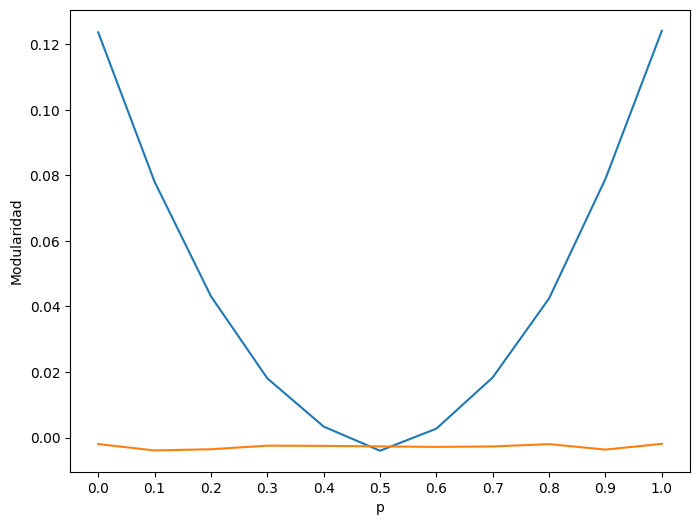

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, 1.1, 0.1), avg_modularities_partition_1)
plt.plot(np.arange(0, 1.1, 0.1), avg_modularities_partition_2)
plt.xlabel('Probabilidad')
plt.ylabel('Modularidad')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

# Q5

# Q6

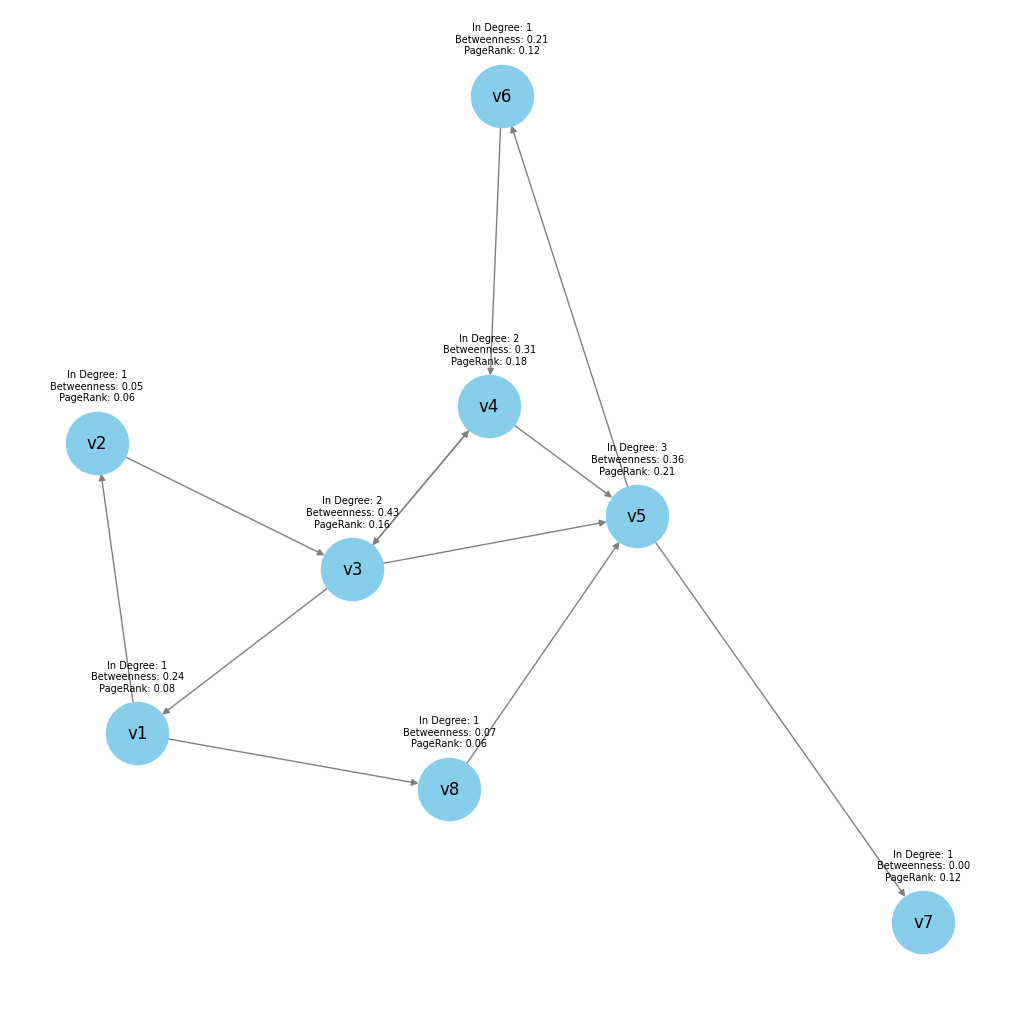

In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

small_graph = nx.read_pajek('data/redchica.net')

degree_dict = dict(small_graph.in_degree())
betweenness_dict = nx.betweenness_centrality(small_graph)
pagerank_dict = nx.pagerank(small_graph)

labels = {node: f"In Degree: {degree_dict[node]}\nBetweenness: {betweenness_dict[node]:.2f}\nPageRank: {pagerank_dict[node]:.2f}"
          for node in small_graph.nodes()}

pos = nx.spring_layout(small_graph)

plt.figure(figsize=(10, 10))
nx.draw(small_graph, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray')

label_pos = {node: (x, y + 0.1) for node, (x, y) in pos.items()}
nx.draw_networkx_labels(small_graph, label_pos, labels=labels, horizontalalignment='center', font_size=7, font_color='black');
plt.show()

In [19]:
data = {"In Degree": degree_dict, "Betweenness": betweenness_dict, "PageRank": pagerank_dict}
data

{'In Degree': {'v1': 1,
  'v2': 1,
  'v3': 2,
  'v4': 2,
  'v5': 3,
  'v6': 1,
  'v7': 1,
  'v8': 1},
 'Betweenness': {'v1': 0.23809523809523808,
  'v2': 0.047619047619047616,
  'v3': 0.42857142857142855,
  'v4': 0.30952380952380953,
  'v5': 0.3571428571428571,
  'v6': 0.21428571428571427,
  'v7': 0.0,
  'v8': 0.07142857142857142},
 'PageRank': {'v1': 0.07772495643200114,
  'v2': 0.06457944396598708,
  'v3': 0.16298039195570818,
  'v4': 0.1800976358851923,
  'v5': 0.20915876345606038,
  'v6': 0.12043968216953191,
  'v7': 0.12043968216953191,
  'v8': 0.06457944396598708}}

In [21]:
import pandas as pd
degree_df = pd.DataFrame(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True), columns=['Node', 'In Degree'])
betweenness_df = pd.DataFrame(sorted(betweenness_dict.items(), key=lambda x: x[1], reverse=True), columns=['Node', 'Betweenness'])
pagerank_df = pd.DataFrame(sorted(pagerank_dict.items(), key=lambda x: x[1], reverse=True), columns=['Node', 'PageRank'])
display(degree_df)
display(betweenness_df)
display(pagerank_df)

,Node,In Degree
0,v5,3
1,v3,2
2,v4,2
3,v1,1
4,v2,1
5,v6,1
6,v7,1
7,v8,1


,Node,Betweenness
0,v3,0.428571
1,v5,0.357143
2,v4,0.309524
3,v1,0.238095
4,v6,0.214286
5,v8,0.071429
6,v2,0.047619
7,v7,0.000000


,Node,PageRank
0,v5,0.209159
1,v4,0.180098
2,v3,0.162980
3,v6,0.120440
4,v7,0.120440
5,v1,0.077725
6,v2,0.064579
7,v8,0.064579


# Q7

In [37]:
import networkx as nx

scientometrics_graph = nx.read_pajek('data/scientometrics_modified.net')

In [44]:
triadics = nx.triadic_census(scientometrics_graph)
triadics = {key: value for key, value in triadics.items() if key not in ['003', '012', '102']}
triadics

{'021D': 22575,
 '021U': 16464,
 '021C': 9761,
 '111D': 3,
 '111U': 3,
 '030T': 1777,
 '030C': 0,
 '201': 0,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 0}

In [62]:
from scipy.stats import zscore

triadics_zscore = zscore(list(triadics.values()))
triadics_zscore = (triadics_zscore - triadics_zscore.min()) / (triadics_zscore.max() - triadics_zscore.min()) - 0.5

In [61]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(list(triadics.keys()), triadics_zscore, marker='o')
# # Show horizontal line at 0
# plt.axhline(0, color='black', linestyle='-')
# plt.xticks(rotation=45)
# plt.xlabel('Triádico')
# plt.ylabel('Z Score')
# plt.title('Triádicos con Z Score')
# plt.show()

In [ ]:
Ma = 22575
Mb = 9761
Mc = 16464
Nfb = 0
Nffa = Nffb = Nffc = 1777

# Q8